# K Nearest Neighbors with Python

We are using a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use k nearest neighbor (KNN) to create a model that directly predicts a class for a new data point based off of the features.


## Import Libraries



import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

we do index_col=0 to use the first column as the index.

In [2]:
data = pd.read_csv("Data", index_col = 0)

In [3]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
data.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

Hence, we have to standardized the data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar = StandardScaler()

In [9]:
scalar.fit(data.drop('TARGET CLASS',axis = 1))

StandardScaler()

In [10]:
scaled_features = scalar.transform(data.drop('TARGET CLASS',axis = 1))

### Now, we make a new data set based on the standardized data

In [12]:
data_feature = pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [13]:
data_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [14]:
data_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WTT     1000 non-null   float64
 1   PTI     1000 non-null   float64
 2   EQW     1000 non-null   float64
 3   SBI     1000 non-null   float64
 4   LQE     1000 non-null   float64
 5   QWG     1000 non-null   float64
 6   FDJ     1000 non-null   float64
 7   PJF     1000 non-null   float64
 8   HQE     1000 non-null   float64
 9   NXJ     1000 non-null   float64
dtypes: float64(10)
memory usage: 78.3 KB


In [15]:
data_feature.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.119105e-16,-2.939871e-16,-1.203482e-16,-1.882938e-16,-6.057377e-16,3.552714e-17,2.255973e-16,-4.760636e-16,3.197442e-16,4.503065e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


## Time to Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['TARGET CLASS'], test_size=0.33)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
KNN = KNeighborsClassifier()

In [21]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
prediction = KNN.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
print(confusion_matrix(y_test, prediction))

[[164  16]
 [ 10 140]]


In [26]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       180
           1       0.90      0.93      0.92       150

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



## How to choose a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [27]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

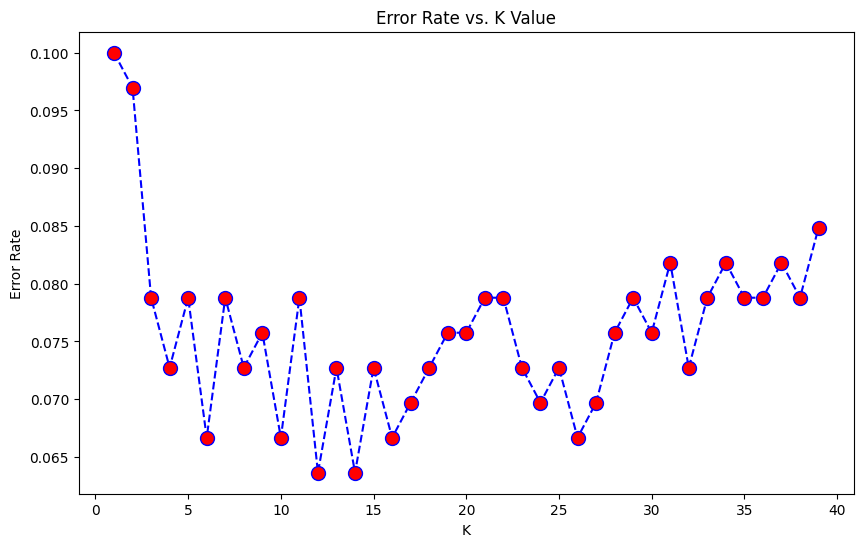

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>13 the error rate just tends to hover around 0.06-0.08 Let's retrain the model with that and check the classification report!

# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

In [29]:

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[163  17]
 [ 16 134]]


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       180
           1       0.89      0.89      0.89       150

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



In [30]:
# NOW WITH K=14
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=14')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=14


[[167  13]
 [  8 142]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       180
           1       0.92      0.95      0.93       150

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



In [31]:
# NOW WITH K=12
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=12')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=12


[[167  13]
 [  8 142]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       180
           1       0.92      0.95      0.93       150

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



In [32]:
# NOW WITH K=40
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=40')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=40


[[163  17]
 [  8 142]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       180
           1       0.89      0.95      0.92       150

    accuracy                           0.92       330
   macro avg       0.92      0.93      0.92       330
weighted avg       0.93      0.92      0.92       330

